# Домашнее задание по исследованию жестких систем ОДУ. Вариант 13.5
### Работу выполнела Кондрашина Анна, 7111

## Постановка задачи:
Рассмотрим жесткую систему ОДУ, которая описывает изменение численность некоторой популяции двух видов и эволюцию некого генетического признака $\alpha$(экогенетическая модель):

$ \dot{x} = x\cdot(1-0.5 x-\frac{2}{7\alpha^2}\cdot y) $

$ \dot{y} = y\cdot(2\cdot \alpha - 3.5\cdot \alpha^2\cdot x -0.5\cdot y)$

$ \dot{\alpha} = \epsilon(2- 7\cdot \alpha x)$

Параметр $\epsilon \leq 0.01$, что означает, что генетический признак меняется незначительно. 
Начальные условия:

$ 0 <  x(0) <  1$

$ y(0) = 1.7$

$ \alpha (0) = 1$

Конечное время интегрирования $T_k = 3000$
Необходимо исследовать систему, получить численные решения. 


## Проанализируем систему:
Системы будет два положения равновесия: $(\frac{2}{5};\frac{10}{7};\frac{5}{7})$ и $(2;0;\frac{1}{7})$. Линеаризуем систему и найдем собственные числа. Для наглядности покажем, как будут располагаться собственные числа на комплексной плоскости.

Положение равновесия, задающееся координатами $(\frac{2}{5};\frac{10}{7};\frac{5}{7})$, будет иметь следующие собственные числа( см. ниже). Видно, что все они действительны, два из них отрицательны,  а одно положительно.То есть это положение равновесия можно классифицировать как седло-фокус(устойчивый). 

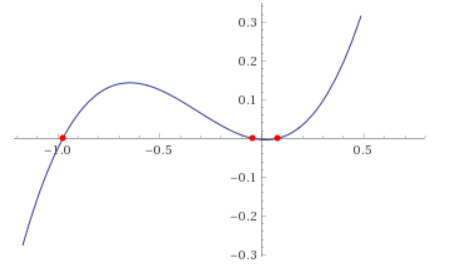

In [667]:
im = Image.open('первоепр.png')
im

Для второго положения равновесия$(2;0;\frac{1}{7})$ два собственных числа будут мнимыми, с положительной действительой частью, а третье - отрицательным, действительным. То есть можно классифицировать это положение равновесия, как седло-фокус(неустойчивый)  Ниже можно увидеть, как собственные числа располагаются на комплексной плоскости.

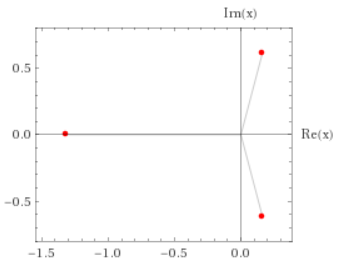

In [668]:
im1 = Image.open('второепр.png')
im1

## методы, используемые для решения задачи
Чтобы посмотреть, как ведет себя система, построим решение следующими численными методами:


Одностадийные:


— CROS - одностадийный метод Розенборка с комплексными коэффициентами. Формула для построения численного решения будет иметь вид:
$$ ( \textbf{E} - h\cdot \frac{1+i}{2}\cdot \textbf{Jac}(t_n,y_n)\cdot \omega = f(t_n +h, h*y_n)$$
$$ y_{n+1} = y_n+h\cdot Re(\omega)$$
Функция устойчивости этого метода будет иметь вид: 
$$ R(z) = \frac{1}{1-z-z^2/2} $$
Построим функцию устойчивости этого метода. Область устойчивости будем изображать темно-зеленым, область неустойчивости - светлозеленым.

In [687]:
Image.open('RCROS.png')


Функция устойчивости этого метода содержит левую действительную полуплоскость, а значит метод является А-устойчивым. Кроме того, $|R(z)| \rightarrow 0$ при $z \rightarrow \infty $ как $\frac{1}{z^2}$, поэтому метод будет L2-устойчивым.

— Метод Рунге-Кутты второго порядка апроксимации с таблицей Бутчера(таблица 1): 
$$A = \begin{pmatrix}
    \frac{1 + \sqrt{2}}{2} & 0\\
    -\sqrt{2} & \frac{1 + \sqrt{2}}{2}
\end{pmatrix}$$

$$b = \begin{pmatrix}
\frac{1}{2} & \frac{1}{2}
\end{pmatrix}$$

$$c = \begin{pmatrix}
\frac{1 + \sqrt{2}}{2}\\
\frac{1 - \sqrt{2}}{2}
\end{pmatrix}$$

Функция устойчивости этого метода будет вычислятся по формуле: 

$$R(z) = \frac{det(E - zA + zeb^{T})}{det(E - zA)}$$

Построим ее. Область устойчивости будем изображать темно-зеленым, область неустойчивости - светлозеленым.



In [ ]:
Image.open('RRK2.png')

Область устойчивости этого метода содержит левую полуплоскость, а значит, он будет A-устойчив.

— Метод Рунге-Кутты второго порядка апроксимации с таблицей Бутчера(таблица 2): 

$$A = \begin{pmatrix}
    \frac{1 - \sqrt{2}}{2} & 0\\
    \sqrt{2} & \frac{1 - \sqrt{2}}{2}
\end{pmatrix}$$

$$b = \begin{pmatrix}
\frac{1}{2} & \frac{1}{2}
\end{pmatrix}$$

$$c = \begin{pmatrix}
\frac{1 - \sqrt{2}}{2}\\
\frac{1 + \sqrt{2}}{2}
\end{pmatrix}$$

Функция устойчивости этого метода также будт вычисляться по формуле: 
$$R(z) = \frac{det(E - zA + zeb^{T})}{det(E - zA)}$$

Построим ее. Область устойчивости будем изображать темно-зеленым, область неустойчивости - светлозеленым.

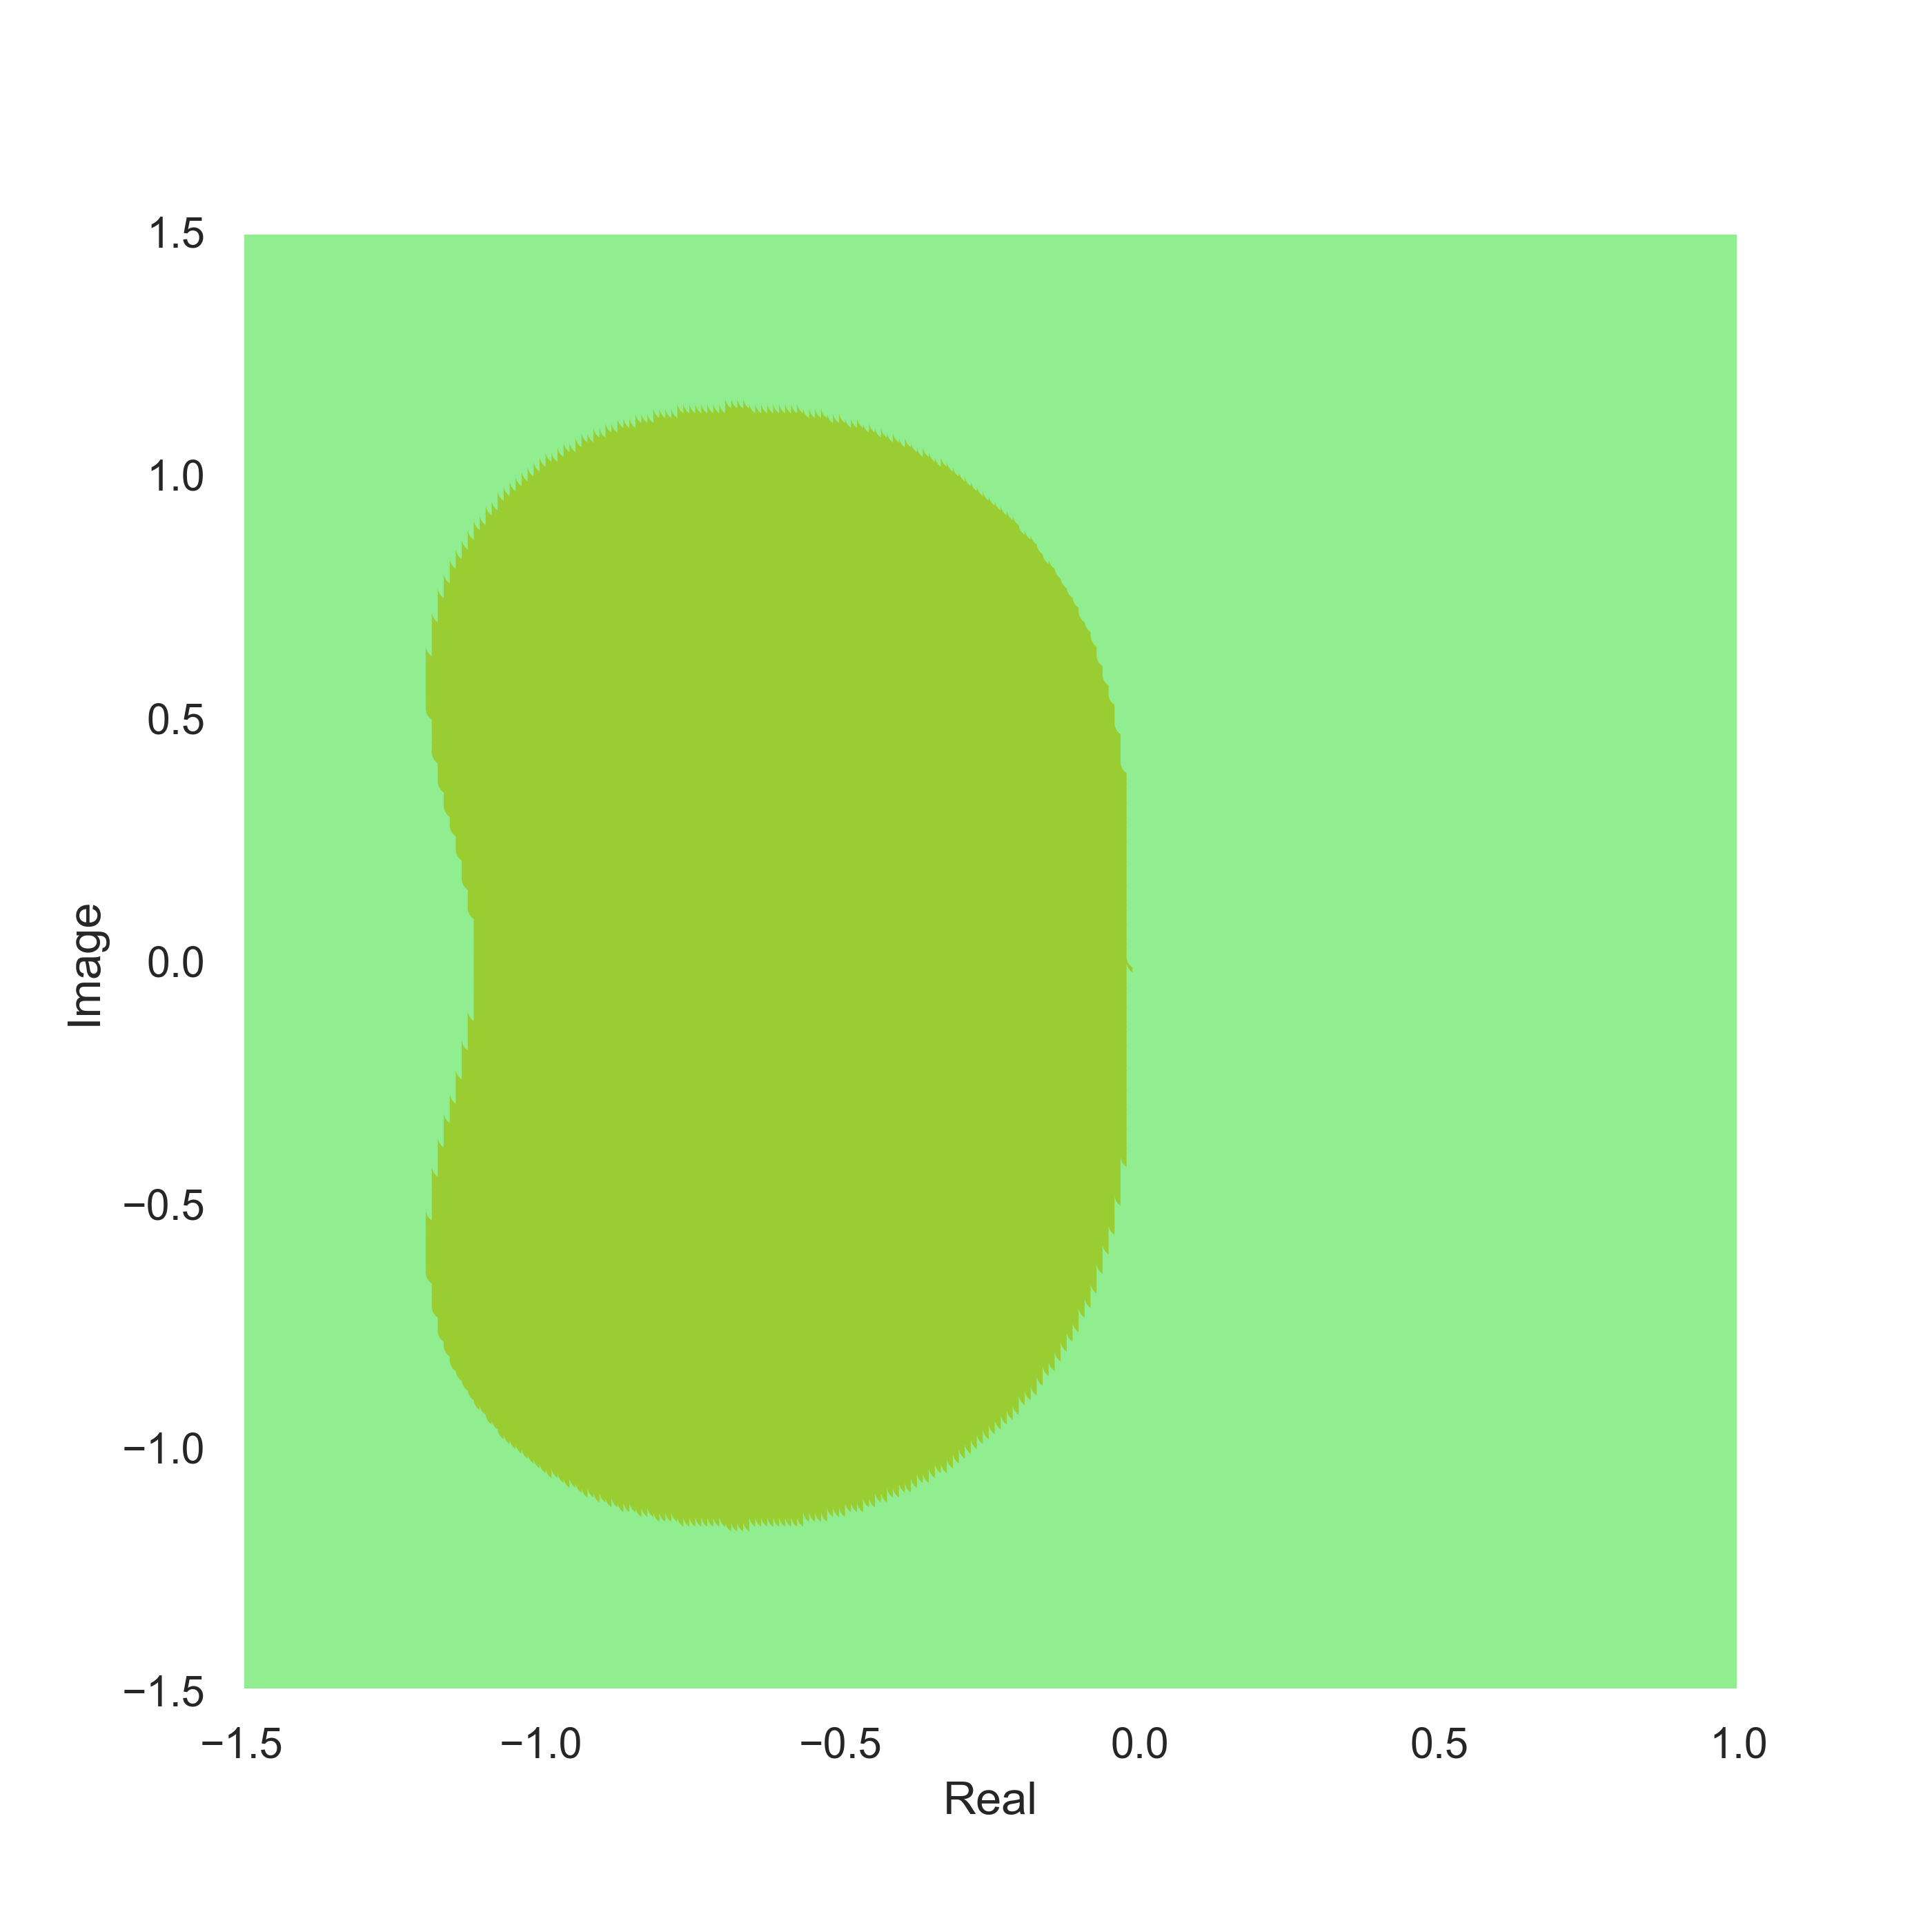

In [693]:
Image.open('RRK21.png')


Этот метод не обладает А-устойчивостью(в этом также можно убедится, построив функцию устойчивости), а значит, и не будет обладать L-устойчивостью

— Метод Рунге-Кутты третьего порядка апроксимации с таблицей Бутчера(таблица 3):

$$A = \begin{pmatrix}
    \frac{3 + \sqrt{3}}{6} & 0\\
    \frac{-\sqrt{3}}{3} & \frac{3 + \sqrt{3}}{6}
\end{pmatrix}$$

$$b = \begin{pmatrix}
\frac{1}{2} & \frac{1}{2}
\end{pmatrix}$$

$$c = \begin{pmatrix}
\frac{3 + \sqrt{3}}{6}\\
\frac{3 - \sqrt{3}}{6}
\end{pmatrix}$$

По той же формуле построим функцию устойчивости этого метода


In [694]:
Image.open('RRK3.png')

Область устойчивости включает в себя левую полуплоскость, то есть метод А-устойчив. 

Многостадийные:

— Формула дифференциирования назад. Решение задается формулой : 
$$
\frac{3}{2}y_{n+1} - 2y_n + \frac{1}{2} y_{n-1} = hf_{n+1}
$$

Начальные условия вычислим методом рунге-кутты третьего порядка апроксимации. Функция устойчивости этого метода будет иметь вид:
$z(R) = \frac{\frac{3}{2} R^{2}(z) - 2R(z) + \frac{1}{2}}{R^{2}(z)}$

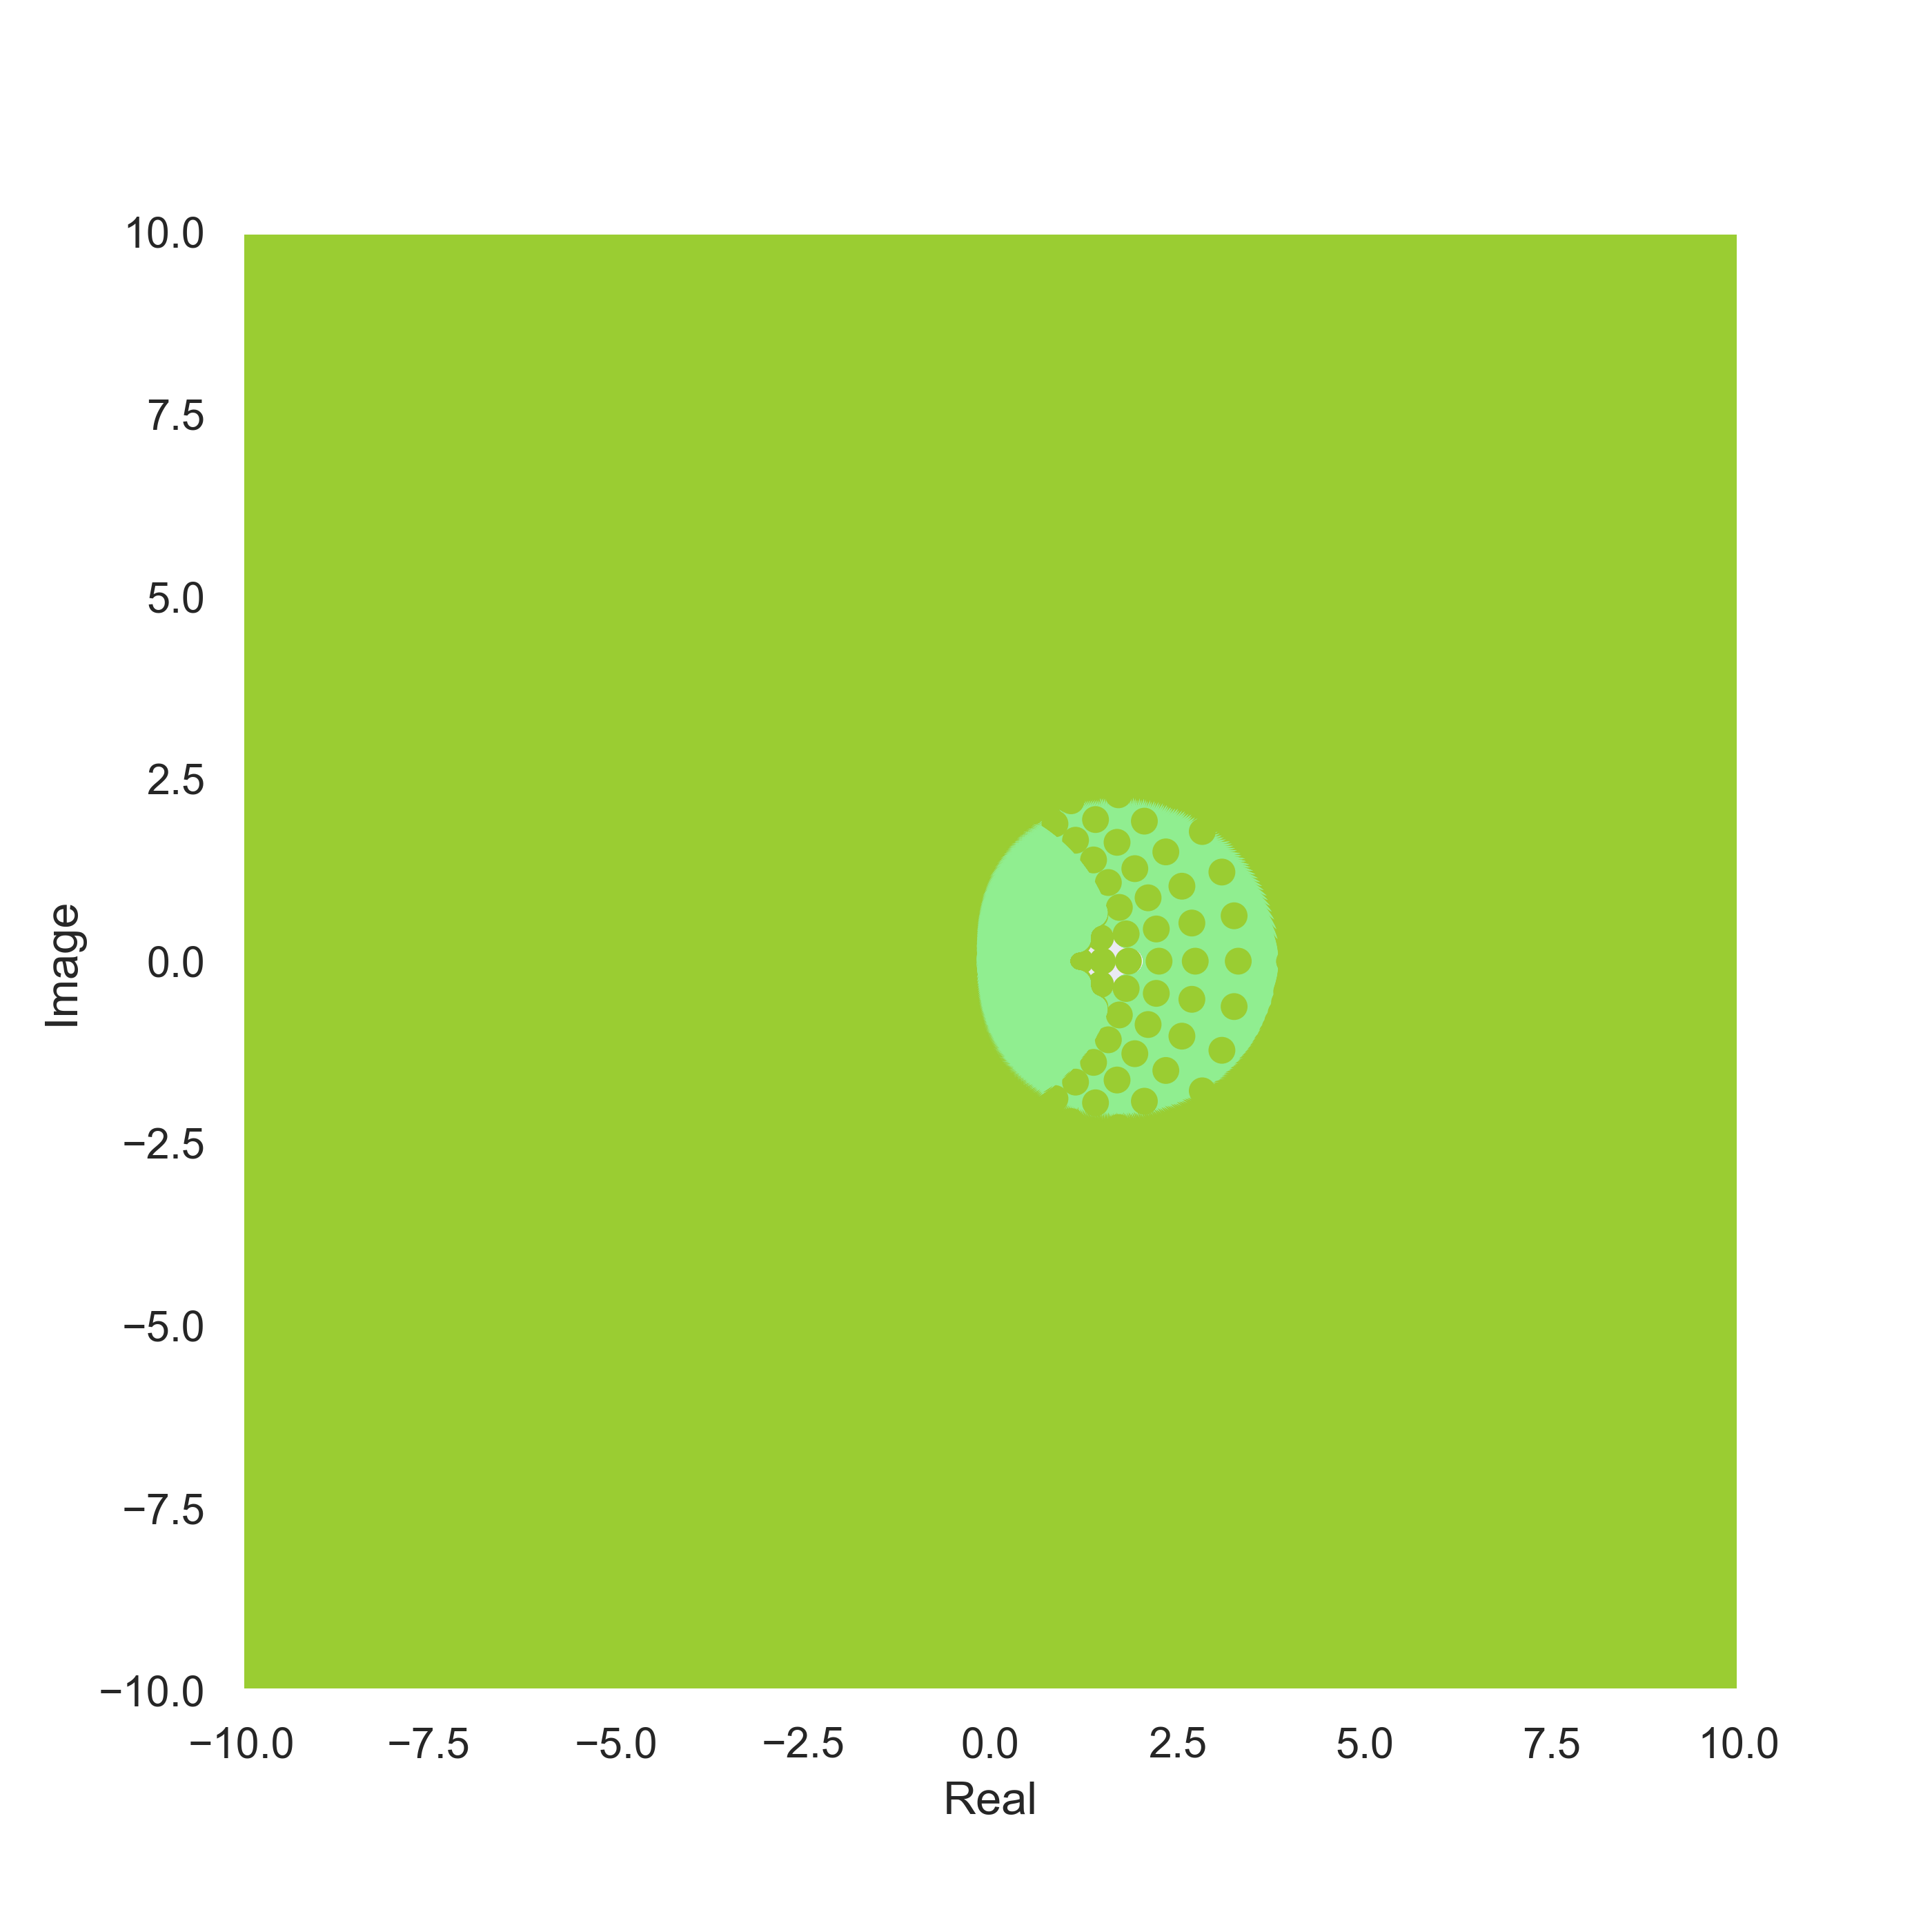

In [695]:

Image.open('RFDN.png')

— Формула дифференциирования назад в представлении Нордсика
Этот метод является самостоятельно стартующим, то есть при старте можно положить начальный ветор Нордсика равным, например, $(z_0,0,0)$ или $(z_0,hf(z_0),0)$ и тд, что позволит начать вычисления. Стартуя как метод меньшего пордка апроксимации, после прохождения "разгонного" участка, метод стремится к максимально возможному для данной задачи порядку апроксимации. 

## Результаты расчетов

Построим графики полученных численных решений. Для одностадийных методов решения будут иметь следующий вид:

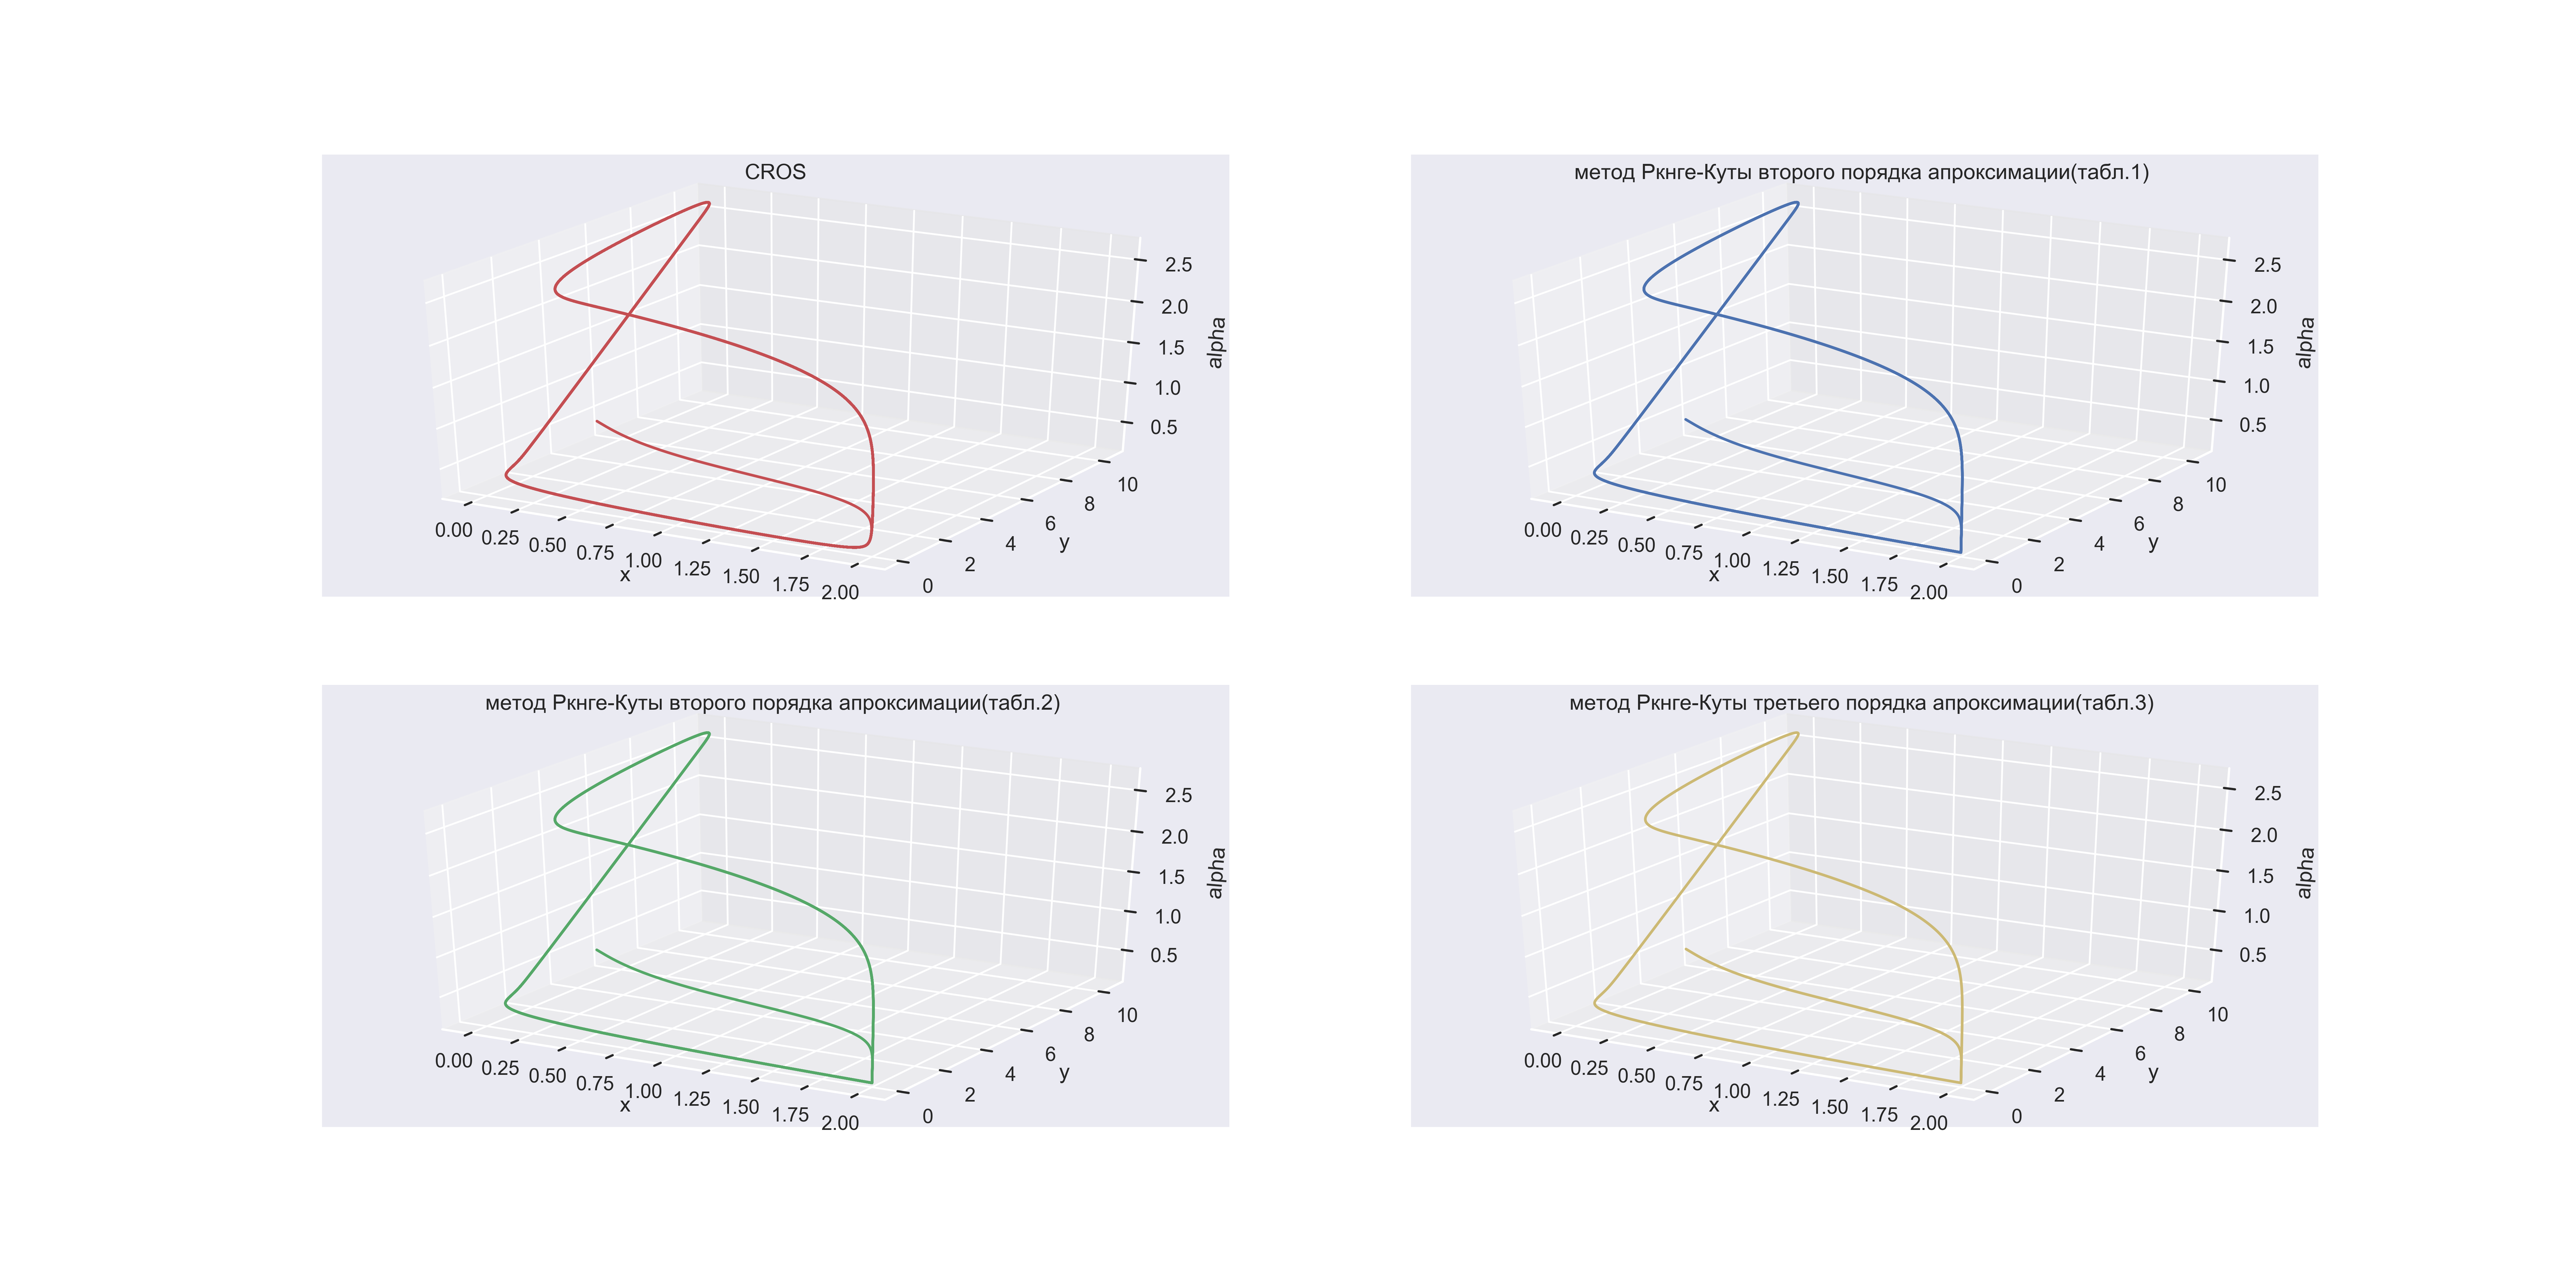

In [702]:
Image.open('Mono.png')

Для многошаговых: 

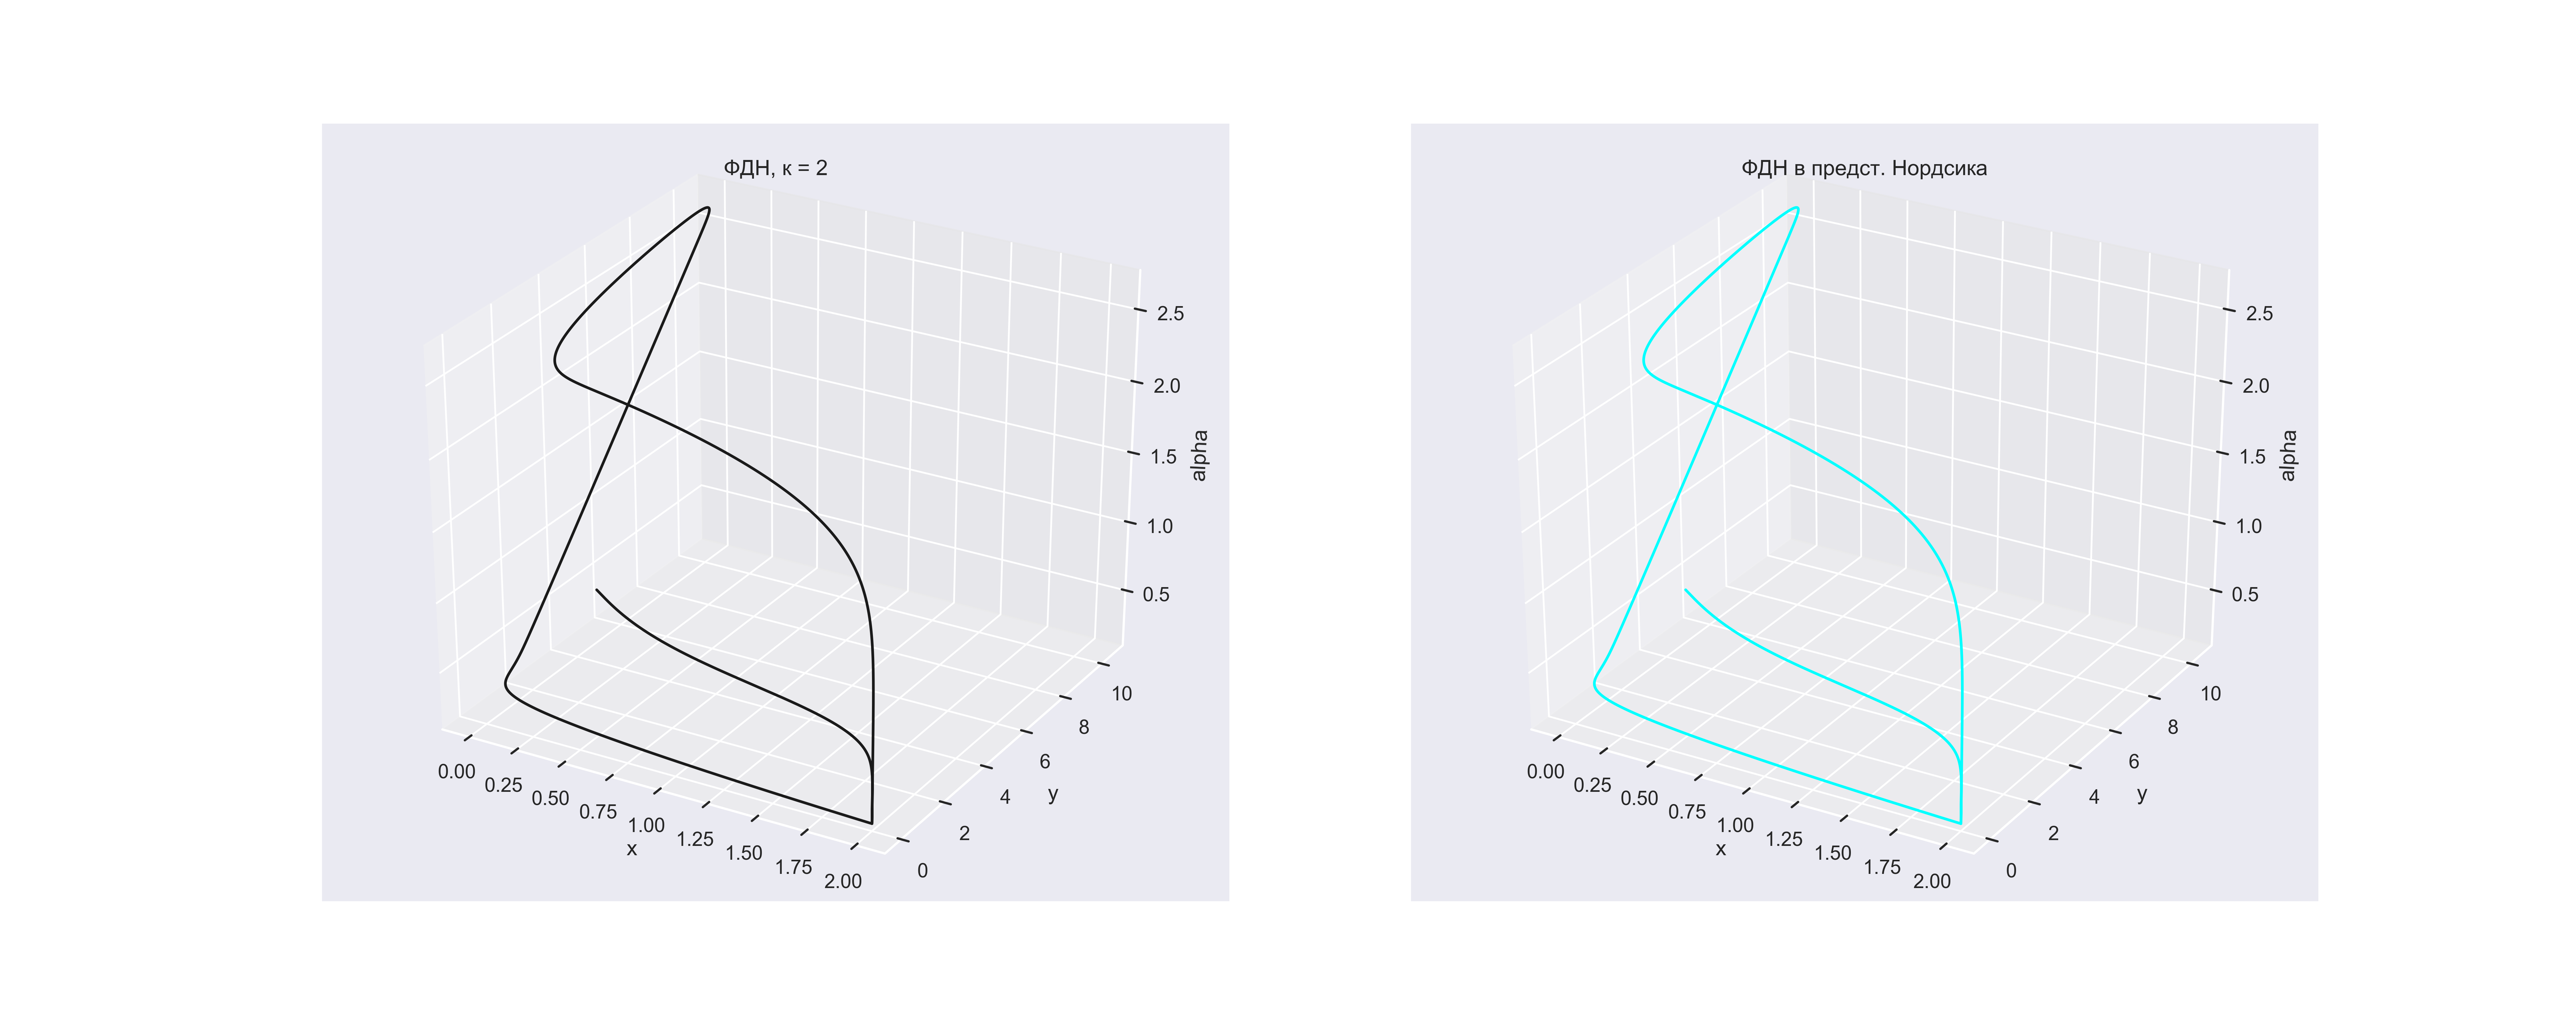

In [703]:
Image.open('Poly.png')

Посчитаем невязки методов для полученных нами решений. Будем считать относительно метода Рунге-Кутты третьего порядка, так как у этого метода наивысший порядок апроксимациииз тех, что спользуются в задаче

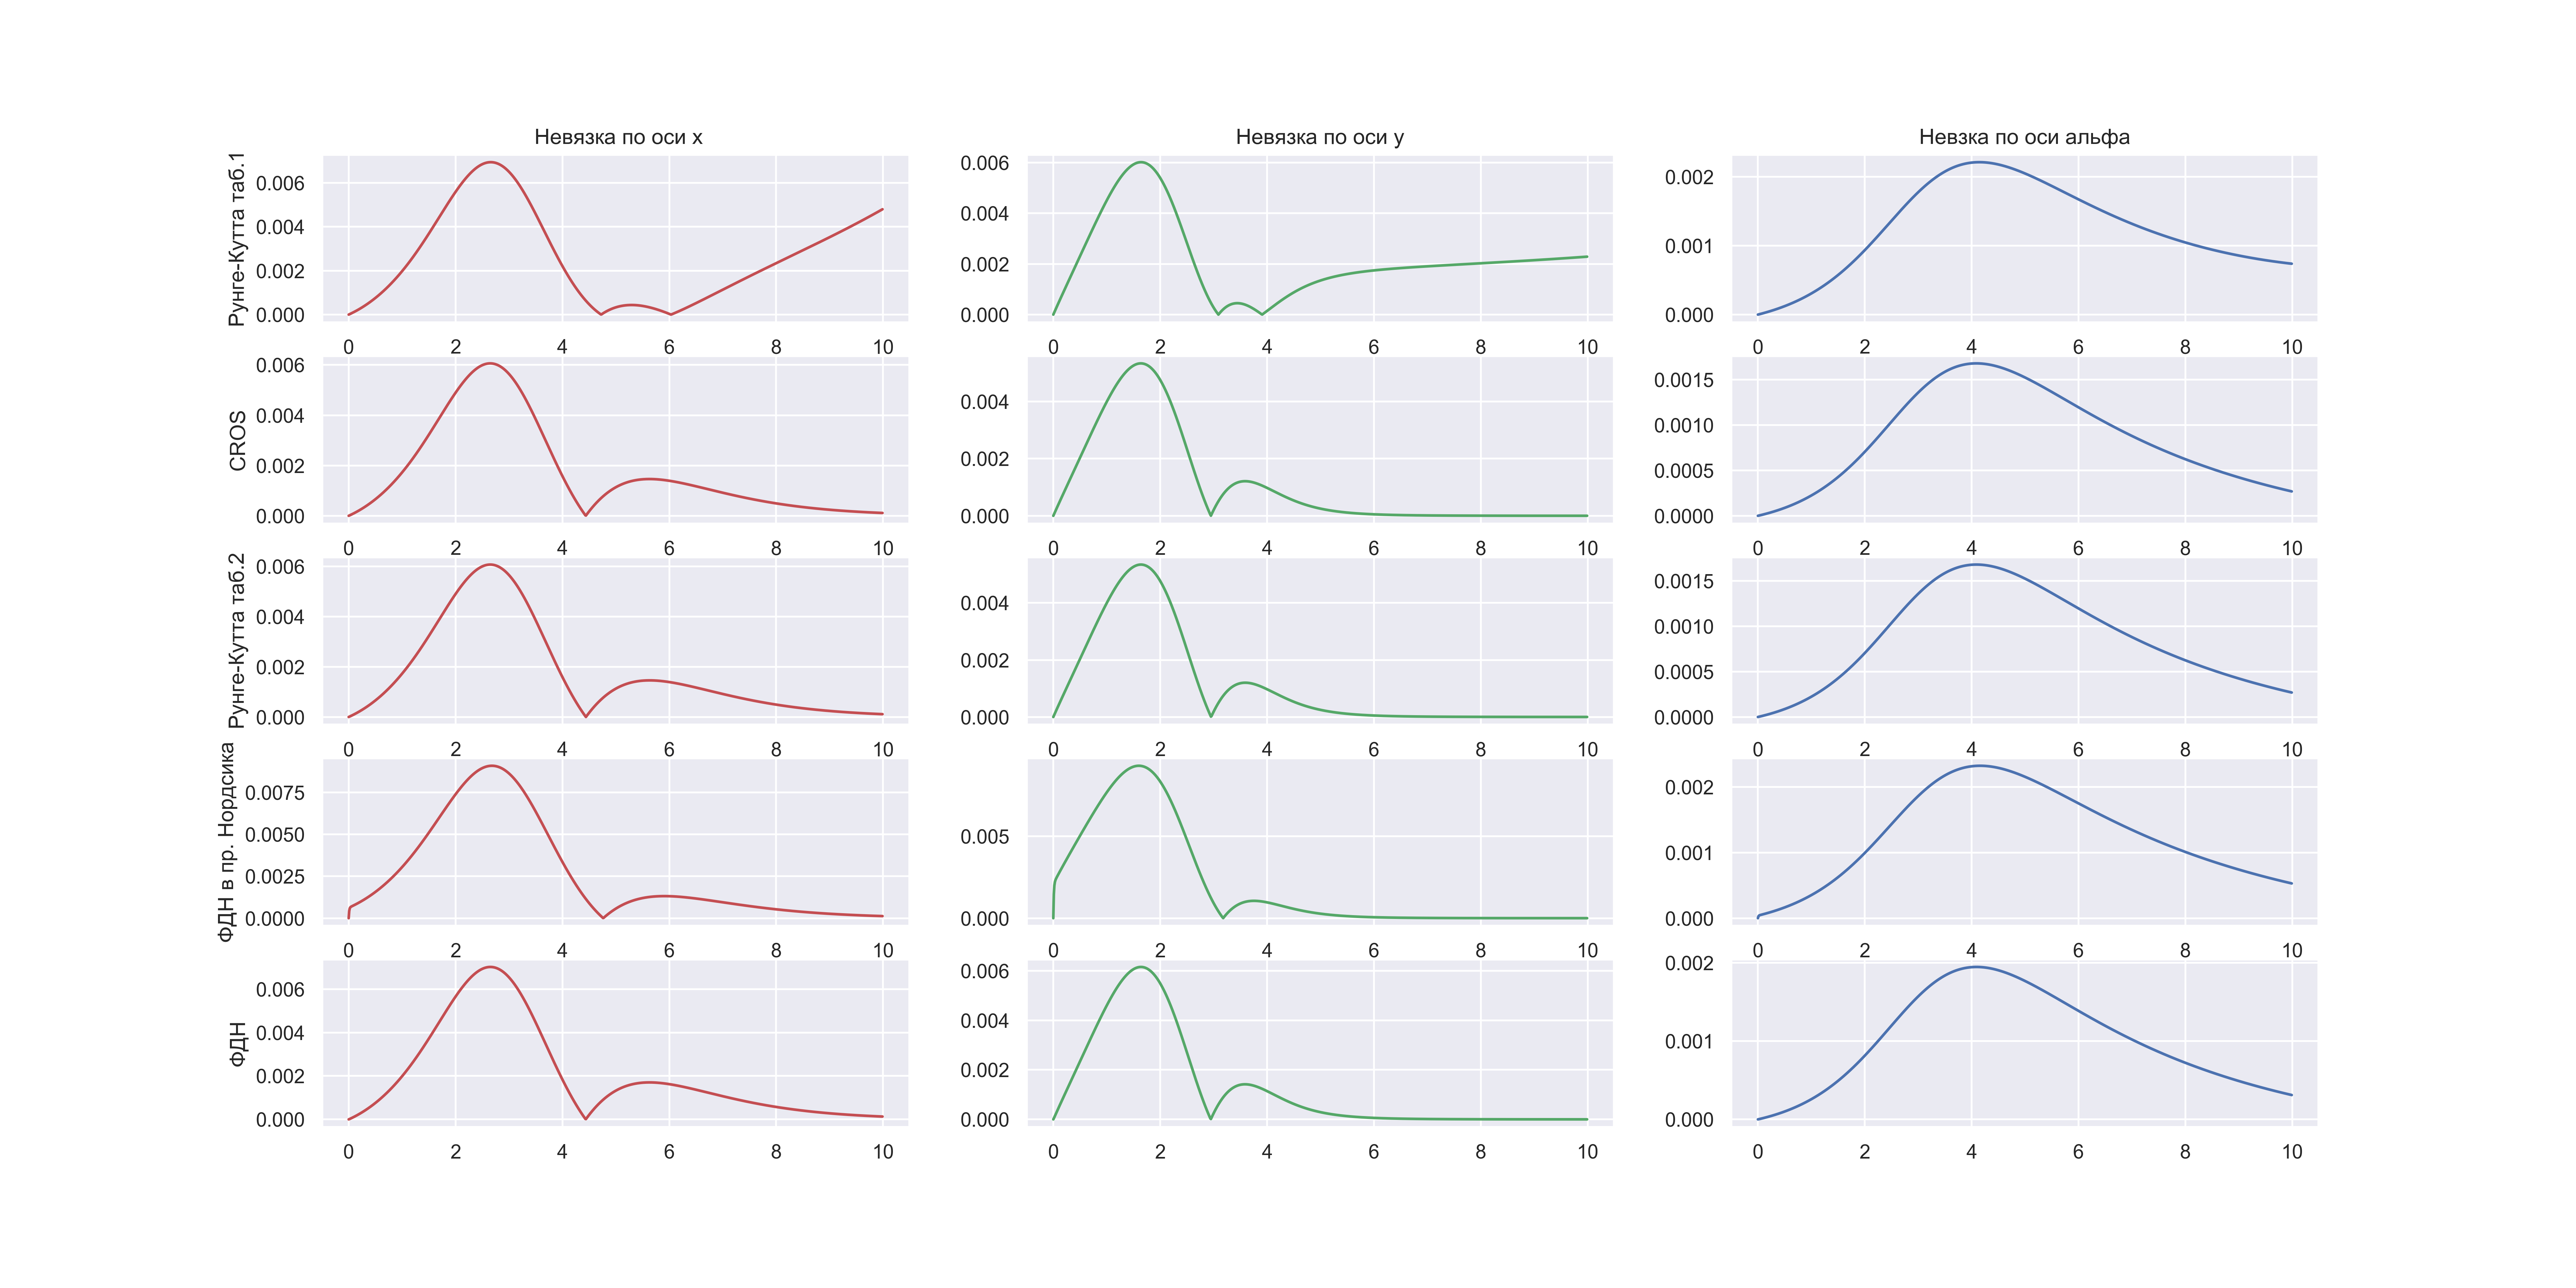

In [733]:
Image.open('RFDN.png')

Видно, что невязка первого метода становится больше со временем. Это происходит из-за неустойчивости метода.

## Обсуждение результатов 

В ходе работы была исследована экогенетическая модель некой популяции. Аналитически было показано, что данная система будет два положения равновесия: седло-узел(неустойчивый) и седло-фокус( также неустойчивый). Решения, построенные численными методами, дали схожий результат: периодическое решение, переходящее от одного положенияравновасия к другому (релаксационные колебания)